## Importing dataset and modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist(data, x_label="", y_label="", title="", bins=5):
    # matplotlib histogram
    plt.hist(data, color = 'blue', edgecolor = 'black', bins=bins)

    # Add labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

## Global variables

In [3]:
from pathlib import Path

data_dir = Path('../data')
cache_dir_github = data_dir.joinpath('github')
bots_dataset_path = data_dir.joinpath('bots-dataset.csv')
bots_issues_dir = data_dir.joinpath('bots-issues')
labeled_csv = data_dir.joinpath('dataset-labeled.csv')

In [ ]:
issues_dataset = pd.read_csv(labeled_csv)
issues_dataset = issues_dataset.loc[issues_dataset['td-label'] != '-'].drop(['Unnamed: 0'], axis=1)

## RQ0 - Demographics

In [3]:
for b in issues_dataset['bot'].unique().tolist():
    sections_per_bot = issues_dataset.loc[issues_dataset['bot'] == b]
    projects = [f'{sections_per_bot["owner"][i]}_{sections_per_bot["project"][i]}' for i in sections_per_bot.index]
    print(f'{b}: {len(set(projects))}')

glassfishrobot: 5
k8s-ci-robot: 43
brotherlogic: 39
fejta-bot: 30
gopherbot: 2
fire-bot: 133
DartBot: 4
cf-gitbot: 35


In [5]:
from minirig import load_csv_dataset

bots_dataset = load_csv_dataset(bots_dataset_path)

In [15]:
len([b for b in bots_dataset if b['issue_count'] != "na" and int(b['issue_count']) >= 100])

113

In [18]:
s = sum([int(b['issue_count']) for b in bots_dataset if b['issue_count'] != "na" and int(b['issue_count']) >= 100])

st = sum([int(b['issue_count']) for b in bots_dataset if b['issue_count'] != "na"])

s/st*100

99.41743635954043

## RQ1 - What is the proportion of sections with TD in issues that involves bots?

In [4]:
#Propoprtion in the whole dataset
sections_with_td = issues_dataset.loc[issues_dataset['td-label'] != 'non-SATD']
len(sections_with_td)/len(issues_dataset)

0.07675897681280779

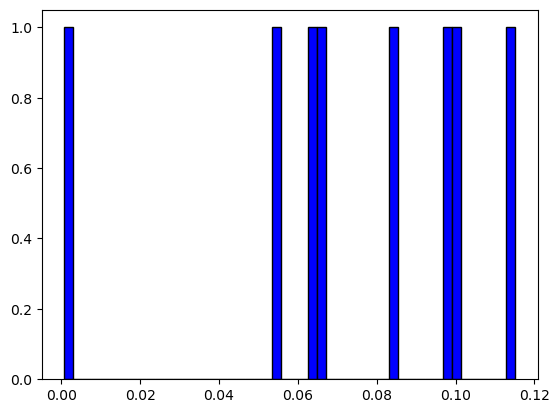

,issue
bot,
DartBot,0.066687
brotherlogic,0.000779
cf-gitbot,0.098955
fejta-bot,0.115165
fire-bot,0.099942
glassfishrobot,0.062729
gopherbot,0.053412
k8s-ci-robot,0.084082


In [5]:
#Proportion per bot
proportions_per_bot = sections_with_td.loc[:,['issue','bot']].groupby('bot').count()/issues_dataset.loc[:,['issue','bot']].groupby('bot').count()
plot_hist(proportions_per_bot, bins=50)
proportions_per_bot

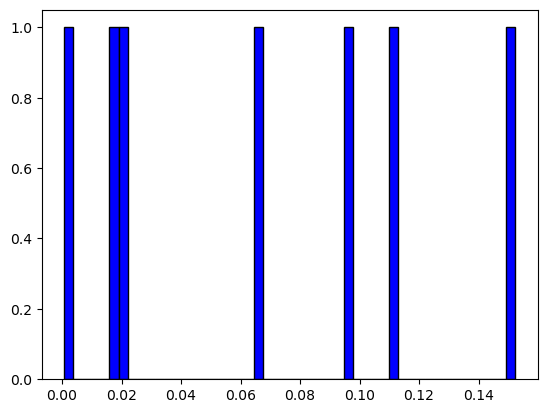

                   issue
bot                     
DartBot         0.095089
brotherlogic    0.000782
cf-gitbot            NaN
fejta-bot       0.018155
fire-bot        0.152363
glassfishrobot  0.066928
gopherbot       0.110008
k8s-ci-robot    0.021277
                issue
bot                  
DartBot           273
brotherlogic        1
fejta-bot          25
fire-bot          158
glassfishrobot    752
gopherbot         277
k8s-ci-robot       27
                issue
bot                  
DartBot          2871
brotherlogic     1279
cf-gitbot         234
fejta-bot        1377
fire-bot         1037
glassfishrobot  11236
gopherbot        2518
k8s-ci-robot     1269


In [4]:
#Proportions in sections created by bots

sections_gernerate_by_bots = issues_dataset.loc[issues_dataset['bot'] == issues_dataset['author-login']]

sections_td = sections_gernerate_by_bots.loc[sections_gernerate_by_bots['td-label'] == 'SATD',['issue','bot']]
section_non_td = sections_gernerate_by_bots.loc[sections_gernerate_by_bots['td-label'] == 'non-SATD', ['issue','bot']]

proportions = sections_td.groupby('bot').count()/section_non_td.groupby('bot').count()
plot_hist(proportions, bins=50)
print(proportions)
print(sections_td.groupby('bot').count())
print(section_non_td.groupby('bot').count())